## **Task 1. Image classification + OOP**

In this task we need to train 3 classification models such as:
* Random Forest;
* Feed-Forward Neural Network
* Convolutional Neural Network
To do that we will use PyTorch Franework with MNIST dataset from torchvision to build our neural networks, and get Random Forest algorithm from scikit-learn

In [1]:
#Firstly, let's install and import all necessary libs
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import datasets
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.transforms import v2
from torchmetrics.classification import Accuracy
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from abc import ABC, abstractmethod
import torchvision.datasets as datasets
from sklearn.ensemble import RandomForestClassifier


In [3]:
# Next, let's import models architectures, MnistClassifierInterface and the MnistClassifier itself.

from MnistClassifier import MnistClassifier
from models.CNNMnistModel import CNNMnistModel
from models.FFNNMnistModel import FFNNMnistModel
from models.RandomForestModel import RandomForestModel

Next, we have to load a MNIST dataset using torchvision.datasets segment

In [4]:
train_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=v2.Compose([
                  v2.ToTensor()
                ]),
    target_transform=None
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=v2.Compose([
                    v2.ToTensor()
                ]),
)

/usr/local/lib/python3.11/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.0MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 483kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.37MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 1.60MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



Now, let's see what classes are included in this dataset and samples number

In [5]:
classes = train_data.classes
classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [6]:
print(f"{len(train_data.data)} | {len(test_data.data)}")
print(f"{len(train_data.targets)} | {len(test_data.targets)}")

60000 | 10000
60000 | 10000


Let's check images in the very dataset


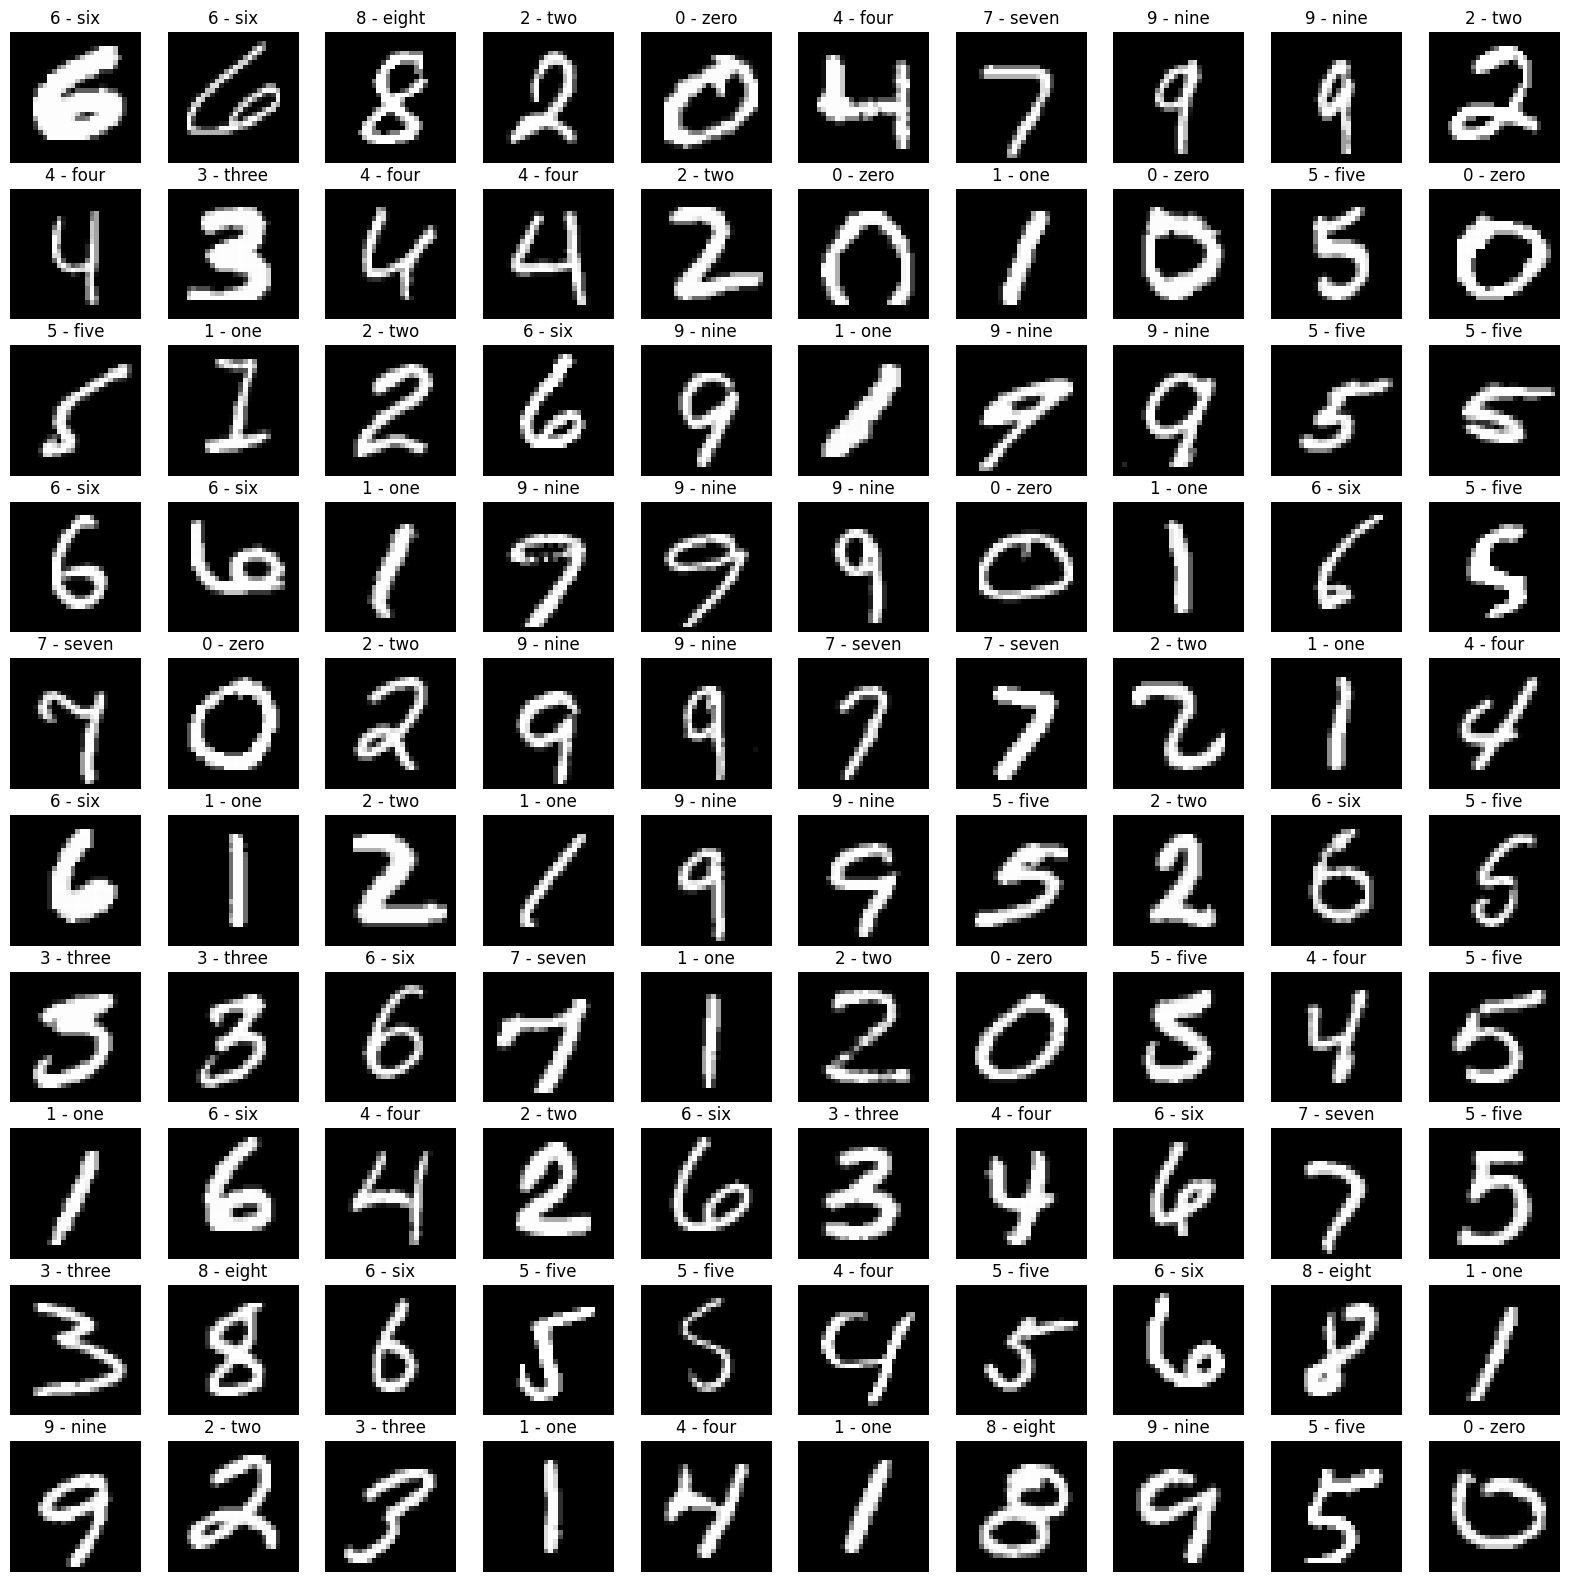

In [7]:
torch.manual_seed(42)
fig = plt.figure(figsize=(20, 20))
rows, cols = 10, 10
for i in range(1, rows * cols + 1):
  random_i = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_i]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(classes[label])
  plt.axis(False)

Next, we have to split train dataset to validation and training itself

In [8]:
# Convert dataset for RandomForest (flattened images)
def convert_to_sklearn_format(dataset):
    images = np.array([np.array(img[0]).reshape(-1) for img in dataset])  # Flatten 28x28 -> 784
    labels = np.array([img[1] for img in dataset])  # Extract labels
    return images, labels

In [9]:
#For neural networks
train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size
train_subset, val_subset = random_split(train_data, [train_size, val_size])

In [10]:
print(f"Training set size: {len(train_subset)}")
print(f"Validation set size: {len(val_subset)}")
print(f"Test set size: {len(test_data)}")

Training set size: 48000
Validation set size: 12000
Test set size: 10000


After all, we can create dataloaders for Neural Networks training

In [11]:
batch_size = 64
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

# Initialize classifiers
rf_classifier = MnistClassifier('rf')
nn_classifier = MnistClassifier('nn')
cnn_classifier = MnistClassifier('cnn')

In [12]:
# Training Random Forest
rf_classifier.train(convert_to_sklearn_format(train_subset), None)

In [13]:
# Training FFNN
nn_classifier.train(train_loader, val_loader)

Epoch 1/5
Train Loss: 0.26381 | Train Acc: 0.92
Val Loss: 0.17003 | Val Acc: 0.95

Epoch 2/5
Train Loss: 0.09935 | Train Acc: 0.97
Val Loss: 0.10245 | Val Acc: 0.97

Epoch 3/5
Train Loss: 0.06394 | Train Acc: 0.98
Val Loss: 0.08425 | Val Acc: 0.97

Epoch 4/5
Train Loss: 0.04389 | Train Acc: 0.99
Val Loss: 0.08732 | Val Acc: 0.97

Epoch 5/5
Train Loss: 0.03435 | Train Acc: 0.99
Val Loss: 0.09001 | Val Acc: 0.97



In [14]:
# Training CNN
cnn_classifier.train(train_loader, val_loader)

Epoch 1/5
Train Loss: 0.17715 | Train Acc: 0.94
Val Loss: 0.05789 | Val Acc: 0.98

Epoch 2/5
Train Loss: 0.04847 | Train Acc: 0.98
Val Loss: 0.08045 | Val Acc: 0.98

Epoch 3/5
Train Loss: 0.03507 | Train Acc: 0.99
Val Loss: 0.03958 | Val Acc: 0.99

Epoch 4/5
Train Loss: 0.02517 | Train Acc: 0.99
Val Loss: 0.04151 | Val Acc: 0.99

Epoch 5/5
Train Loss: 0.01958 | Train Acc: 0.99
Val Loss: 0.04257 | Val Acc: 0.99



In [15]:
# Calculate accuracies
def calculate_accuracy(model, test_data):
    if isinstance(model, RandomForestModel):
        # For Random Forest
        X_test, y_test = convert_to_sklearn_format(test_data)
        preds = model.predict(convert_to_sklearn_format(test_data))
    else:
        # For neural networks
        test_loader = test_data  # Assume it's already a DataLoader
        preds = model.predict(test_loader)
        y_test = torch.cat([y for _, y in test_loader]).numpy()

    return (preds == y_test).mean()

In [16]:
print(f"Random Forest Accuracy: {calculate_accuracy(rf_classifier.model, test_data):.2%}")

Random Forest Accuracy: 96.73%


In [17]:
print(f"FFNN Accuracy: {calculate_accuracy(nn_classifier.model, test_loader):.2%}")

FFNN Accuracy: 97.54%


In [18]:
print(f"CNN Accuracy: {calculate_accuracy(cnn_classifier.model, test_loader):.2%}")


CNN Accuracy: 99.03%


As we can see, all the 3 models show a good perfomance, now let's display prediction results

In [19]:
# Generate test samples
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# Convert to proper format for visualization
test_labels = np.array(test_labels)

In [20]:
# Add prediction visualization functions
def make_predictions(model: torch.nn.Module, data: list, device: torch.device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)

def plot_predictions(model, test_samples, test_labels, class_names, n_plots=9):
    plt.figure(figsize=(9, 9))
    nrows = 3
    ncols = 3

    # Handle different model types
    if isinstance(model, RandomForestModel):
        # Convert samples for Random Forest
        test_images = np.array([img.squeeze().numpy().reshape(-1) for img in test_samples])
        pred_probs = model.clf.predict_proba(test_images)
        pred_classes = np.argmax(pred_probs, axis=1)
    else:
        # Handle neural networks
        device = model.device
        test_images = torch.stack(test_samples).to(device)
        if isinstance(model, (FFNNMnistModel, CNNMnistModel)):
            pred_probs = make_predictions(model.model, test_images, device)
            pred_classes = torch.argmax(pred_probs, dim=1).cpu().numpy()

    for i in range(n_plots):
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(test_samples[i].squeeze(), cmap="gray")

        pred_label = class_names[pred_classes[i]]
        truth_label = class_names[test_labels[i]]

        title_color = "g" if pred_label == truth_label else "r"
        plt.title(f"Pred: {pred_label} | Truth: {truth_label}",
                 fontsize=10, c=title_color)
        plt.axis(False)



Random Forest Predictions:


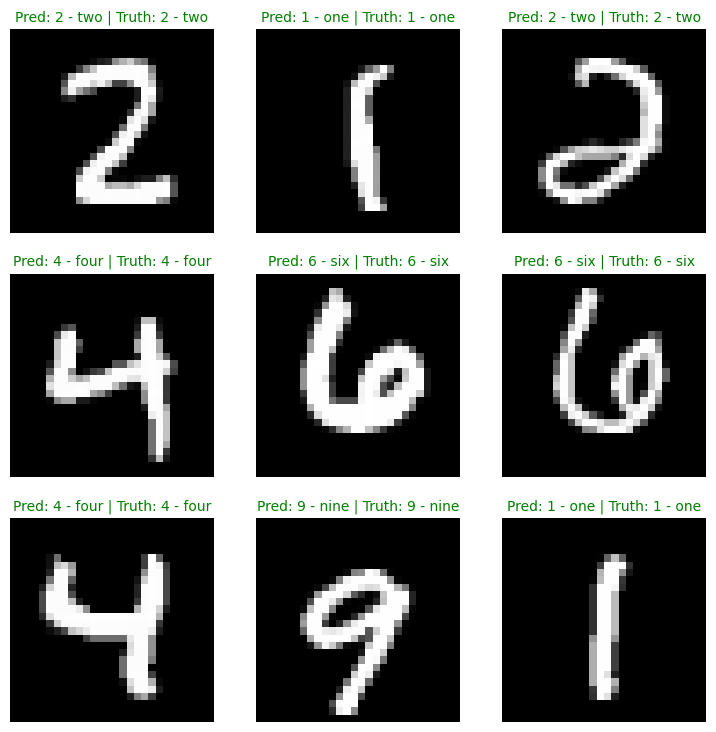

In [21]:
# Create visualization for each model
print("\nRandom Forest Predictions:")
plot_predictions(rf_classifier.model, test_samples, test_labels, classes)


Feed-Forward NN Predictions:


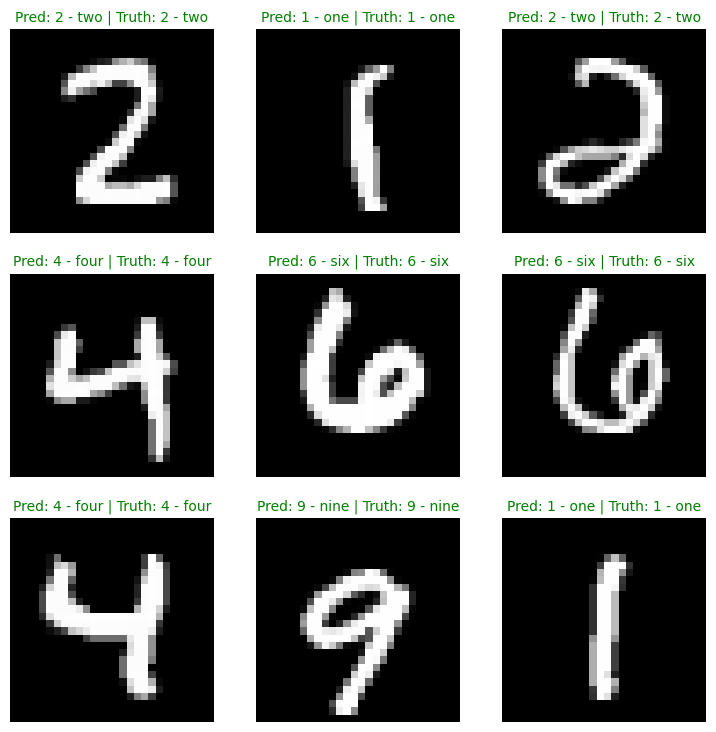

In [22]:
print("\nFeed-Forward NN Predictions:")
plot_predictions(nn_classifier.model, test_samples, test_labels, classes)


CNN Predictions:


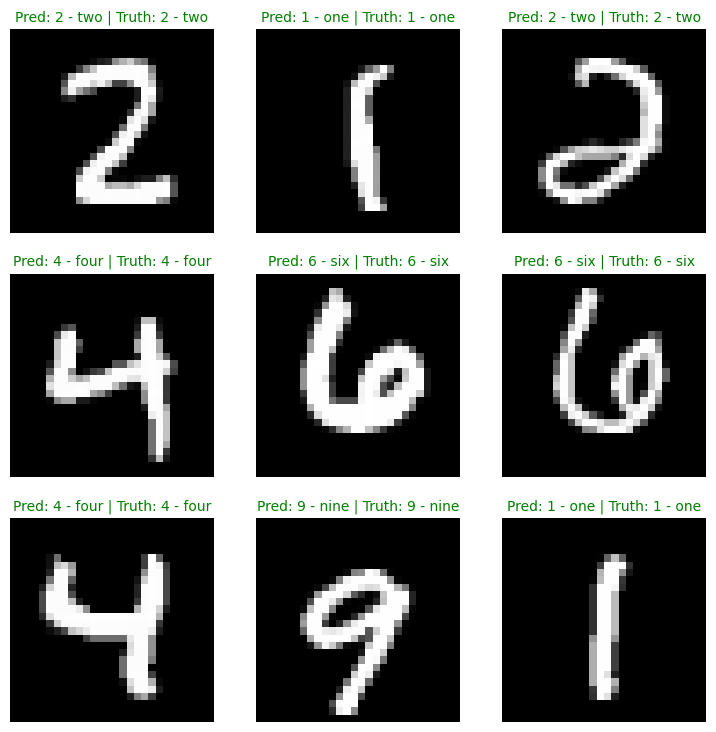

In [23]:
print("\nCNN Predictions:")
plot_predictions(cnn_classifier.model, test_samples, test_labels, classes)